## This script can be used to calculate Wet Bulb Temperature (WBT), Mean Radiant Temperature (MRT) and Wet Bulb Globe Temperature (WBGT) using standard meteorological outputs from WRF model

* The calculations are done using Thermofeel library which is developed by ECMWF. To know more about Thermofeel, feel free to read the paper below:
https://www.sciencedirect.com/science/article/pii/S2352711022000176#b18


* Thermofeel documentation is here:
https://thermofeel.readthedocs.io/en/latest/?

* Also a pdf of the documention can be found here:
https://thermofeel.readthedocs.io/_/downloads/en/latest/pdf/

* The Github repository of Thermofeel is located here:
https://github.com/ecmwf/thermofeel


In [ ]:
#These are all the libraries you will need to use this notebook
#https://github.com/ElsevierSoftwareX/SOFTX-D-21-00124/blob/master/examples/thermofeelexamplesourcecode1.py

!pip install thermofeel
!pip install netCDF4
import thermofeel
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import thermofeel as tf

  Preparing metadata (setup.py) ... done
  Created wheel for thermofeel: filename=thermofeel-2.0.0-py3-none-any.whl size=19257 sha256=789bb8060e9f58694400eb0bce02d6cf399b5e481e69a52611516228d78ba030
  Stored in directory: /root/.cache/pip/wheels/13/ed/96/9273ffe8ffa6879082b70b5716fb2a46d4a6e6a7bbe408efca
Successfully built thermofeel
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.0 MB/s eta 0:00:00


In [ ]:
# Read model output data to be used in Thermofeel

import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Relative humidity and dew point data were calculated with wrfout_to_cf_irr2_highrate2mm_realistic2_highrate.ncl script

# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_rh2m.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_apr_sensor = rh_20[168:888, :, :]; del rh_20;#
rh_20_apr_sensor = shift(rh_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_apr_sensor.shape)

# Read NetCDF file for dew point temperature at 2m
td_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_rh2m.nc')
td_20 = td_dataset['td2m'][:]; del td_dataset;
print(td_20.shape)
td_20_apr_sensor = td_20[168:888, :, :]; del td_20;#
td_20_apr_sensor = shift(td_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(td_20_apr_sensor.shape)

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_apr_sensor = T2_20[168:888, :, :]; del T2_20;#
T2_20_apr_sensor = shift(T2_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_apr_sensor.shape)

# now read wind speed data

u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_apr_sensor = u_20[168:888, :, :]; del u_20;#
u_20_20_apr_sensor = shift(u_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_apr_sensor.shape)

v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_apr_sensor = v_20[168:888, :, :]; del v_20;#
v_20_20_apr_sensor = shift(v_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_apr_sensor.shape)

ws_20_apr_sensor = np.sqrt(u_20_20_apr_sensor**2+v_20_20_apr_sensor**2);

# Now read radiation fields

coszen_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
coszen_20 = coszen_dataset['coszen'][:]; del coszen_dataset;
print(coszen_20.shape)
coszen_20_apr_sensor = coszen_20[168:888, :, :]; del coszen_20;#
coszen_20_apr_sensor = shift(coszen_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(coszen_20_apr_sensor.shape)

swdown_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
swdown_20 = swdown_dataset['swdown'][:]; del swdown_dataset;
print(swdown_20.shape)
swdown_20_apr_sensor = swdown_20[168:888, :, :]; del swdown_20;#
swdown_20_apr_sensor = shift(swdown_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swdown_20_apr_sensor.shape)

glw_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
glw_20 = glw_dataset['glw'][:]; del glw_dataset;
print(glw_20.shape)
glw_20_apr_sensor = glw_20[168:888, :, :]; del glw_20;#
glw_20_apr_sensor = shift(glw_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(glw_20_apr_sensor.shape)

swddir_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
swddir_20 = swddir_dataset['swddir'][:]; del swddir_dataset;
print(swddir_20.shape)
swddir_20_apr_sensor = swddir_20[168:888, :, :]; del swddir_20;#
swddir_20_apr_sensor = shift(swddir_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddir_20_apr_sensor.shape)

swddni_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
swddni_20 = swddni_dataset['swddni'][:]; del swddni_dataset;
print(swddni_20.shape)
swddni_20_apr_sensor = swddni_20[168:888, :, :]; del swddni_20;#
swddni_20_apr_sensor = shift(swddni_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddni_20_apr_sensor.shape)

swupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
swupb_20 = swupb_dataset['swupb'][:]; del swupb_dataset;
print(swupb_20.shape)
swupb_20_apr_sensor = swupb_20[168:888, :, :]; del swupb_20;#
swupb_20_apr_sensor = shift(swupb_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swupb_20_apr_sensor.shape)

lwupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
lwupb_20 = lwupb_dataset['lwupb'][:]; del lwupb_dataset;
print(lwupb_20.shape)
lwupb_20_apr_sensor = lwupb_20[168:888, :, :]; del lwupb_20;#
lwupb_20_apr_sensor = shift(lwupb_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(lwupb_20_apr_sensor.shape)


# Calculation the net radiation fields required, which are input to GT/WBGT

ssr = swdown_20_apr_sensor-swupb_20_apr_sensor # surface net solar radiation
strr = glw_20_apr_sensor-lwupb_20_apr_sensor # surface net thermal radiation

ssrd = swdown_20_apr_sensor;
dsrp = swddni_20_apr_sensor;
strd = glw_20_apr_sensor;
fdir = swddir_20_apr_sensor;
cossza = coszen_20_apr_sensor;
td_k = td_20_apr_sensor;
t2_k = T2_20_apr_sensor;
va = ws_20_apr_sensor;
rh = rh_20_apr_sensor

print(np.max(cossza))
print(np.min(cossza))

(171, 162)
(171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
nan
nan


In [ ]:
#Check the availability of thermofeel functions and import them
print(dir(thermofeel))

# import the required thermofeel functions

from thermofeel import (
    calculate_apparent_temperature,
    calculate_bgt,
    calculate_heat_index_adjusted,
    calculate_heat_index_simplified,
    calculate_humidex,
    calculate_mean_radiant_temperature,
    calculate_mrt_from_bgt,
    calculate_normal_effective_temperature,
    calculate_relative_humidity_percent,
    calculate_saturation_vapour_pressure,
    calculate_utci,
    calculate_wbgt_simple,
    calculate_wbgt,
    calculate_wbgt_simple,
    calculate_wbt,
    calculate_wind_chill,
    kelvin_to_celsius,
    kelvin_to_fahrenheit,
    approximate_dsrp,
    helpers,
)


# To calculate WBGT, we neet WBT (we bulb temperature), GT (globe temperature) and dry-bulb temperature (2-m air temp.)

# First Calculate WBT

tw_k = calculate_wbt(t2_k, rh)
rh_noirr = rh;

# convert to F for plotting
tw_f = kelvin_to_fahrenheit(tw_k)

# convert to C for the use in WBGT
tw_c = kelvin_to_celsius(tw_k)
print('tw_c')
print(np.nanmax(tw_c))
print(np.nanmin(tw_c))


# Now calculate mean radiant temperature (mrt) because it is an input for calculating the Black Globe Temperature (bgt)
# this is necessary since black globe temperature is not commonly available. It should be in K

mrt = calculate_mean_radiant_temperature(ssrd=ssrd, ssr=ssr, dsrp=dsrp, strd=strd, fdir=fdir, strr=strr, cossza=cossza)
print('mrt')
print(np.nanmax(mrt))
print(np.nanmin(mrt))

# Now calculate Black Globe Temperature using the above-calculated MRT and then calculate WBGT

import math

from thermofeel.helpers import (celsius_to_kelvin, fahrenheit_to_kelvin, kelvin_to_celsius, kelvin_to_fahrenheit)

#converting to float128 was needed to avoid a warning in calculating bgt because there are so many smaller terms in the equation

t2_k = np.float128(t2_k)
mrt = np.float128(mrt)
va = np.float128(va)

bgt_k = calculate_bgt(t2_k, mrt, va)
print('bgt_k')
print(np.nanmax(bgt_k))
print(np.nanmin(bgt_k))

# Convert bgt from C to F for plotting
bgt_f = kelvin_to_fahrenheit(bgt_k)

#convert bgt in Kelvin to Celsius to be used in WBGT
bgt_c = kelvin_to_celsius(bgt_k)

# convert 2-m air temperature from Kelvin to F for plotting
t2_f = kelvin_to_fahrenheit(t2_k)
t2_f_noirr = t2_f;
# convert 2-m air temperature from Kelvin to Celsius to be used in WBGT
t2_c = kelvin_to_celsius(t2_k)

# Now calculate WBGT

wbgt = 0.7 * tw_c + 0.2 * bgt_c + 0.1 * t2_c
wbgt_k = celsius_to_kelvin(wbgt)

wbgt_f = kelvin_to_fahrenheit(wbgt_k)
print(wbgt_f.shape)
print(np.nanmax(wbgt_f))
print(np.nanmin(wbgt_f))

# calculate max and min for wbgt_f (wet bulb globe temperatuer in F)

wbgt_f_reshape_apr_noirr = np.reshape(wbgt_f, (24, 30, 171, 162), order='F');
del wbgt_f;

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'approximate_dsrp', 'calculate_apparent_temperature', 'calculate_bgt', 'calculate_dew_point_from_relative_humidity', 'calculate_heat_index_adjusted', 'calculate_heat_index_simplified', 'calculate_humidex', 'calculate_mean_radiant_temperature', 'calculate_mrt_from_bgt', 'calculate_nonsaturation_vapour_pressure', 'calculate_normal_effective_temperature', 'calculate_relative_humidity_percent', 'calculate_saturation_vapour_pressure', 'calculate_saturation_vapour_pressure_multiphase', 'calculate_utci', 'calculate_utci_polynomial', 'calculate_wbgt', 'calculate_wbgt_simple', 'calculate_wbt', 'calculate_wind_chill', 'celsius_to_kelvin', 'fahrenheit_to_kelvin', 'helpers', 'kelvin_to_celsius', 'kelvin_to_fahrenheit', 'math', 'np', 'scale_windspeed', 'thermofeel', 'to_radians']
tw_c
30.605804
-13.760864
mrt
368.0468
244.5414
bgt_k
349.49765781692947927
258.08490699

In [ ]:
# Read model output data to be used in Thermofeel

import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Relative humidity and dew point data were calculated with wrfout_to_cf_irr.ncl script

# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_rh2m_irr.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_apr_sensor = rh_20[168:888, :, :]; del rh_20;#
rh_20_apr_sensor = shift(rh_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_apr_sensor.shape)

# Read NetCDF file for dew point temperature at 2m
td_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_rh2m_irr.nc')
td_20 = td_dataset['td2m'][:]; del td_dataset;
print(td_20.shape)
td_20_apr_sensor = td_20[168:888, :, :]; del td_20;#
td_20_apr_sensor = shift(td_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(td_20_apr_sensor.shape)

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_apr_sensor = T2_20[168:888, :, :]; del T2_20;#
T2_20_apr_sensor = shift(T2_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_apr_sensor.shape)

# now read wind speed data

u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_apr_sensor = u_20[168:888, :, :]; del u_20;#
u_20_20_apr_sensor = shift(u_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_apr_sensor.shape)

v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_apr_sensor = v_20[168:888, :, :]; del v_20;#
v_20_20_apr_sensor = shift(v_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_apr_sensor.shape)

ws_20_apr_sensor = np.sqrt(u_20_20_apr_sensor**2+v_20_20_apr_sensor**2);

# Now read radiation fields

coszen_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
coszen_20 = coszen_dataset['coszen'][:]; del coszen_dataset;
print(coszen_20.shape)
coszen_20_apr_sensor = coszen_20[168:888, :, :]; del coszen_20;#
coszen_20_apr_sensor = shift(coszen_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(coszen_20_apr_sensor.shape)

swdown_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
swdown_20 = swdown_dataset['swdown'][:]; del swdown_dataset;
print(swdown_20.shape)
swdown_20_apr_sensor = swdown_20[168:888, :, :]; del swdown_20;#
swdown_20_apr_sensor = shift(swdown_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swdown_20_apr_sensor.shape)

glw_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
glw_20 = glw_dataset['glw'][:]; del glw_dataset;
print(glw_20.shape)
glw_20_apr_sensor = glw_20[168:888, :, :]; del glw_20;#
glw_20_apr_sensor = shift(glw_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(glw_20_apr_sensor.shape)

swddir_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
swddir_20 = swddir_dataset['swddir'][:]; del swddir_dataset;
print(swddir_20.shape)
swddir_20_apr_sensor = swddir_20[168:888, :, :]; del swddir_20;#
swddir_20_apr_sensor = shift(swddir_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddir_20_apr_sensor.shape)

swddni_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
swddni_20 = swddni_dataset['swddni'][:]; del swddni_dataset;
print(swddni_20.shape)
swddni_20_apr_sensor = swddni_20[168:888, :, :]; del swddni_20;#
swddni_20_apr_sensor = shift(swddni_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddni_20_apr_sensor.shape)

swupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
swupb_20 = swupb_dataset['swupb'][:]; del swupb_dataset;
print(swupb_20.shape)
swupb_20_apr_sensor = swupb_20[168:888, :, :]; del swupb_20;#
swupb_20_apr_sensor = shift(swupb_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swupb_20_apr_sensor.shape)

lwupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
lwupb_20 = lwupb_dataset['lwupb'][:]; del lwupb_dataset;
print(lwupb_20.shape)
lwupb_20_apr_sensor = lwupb_20[168:888, :, :]; del lwupb_20;#
lwupb_20_apr_sensor = shift(lwupb_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(lwupb_20_apr_sensor.shape)


# Calculation the net radiation fields required, which are input to GT/WBGT

ssr = swdown_20_apr_sensor-swupb_20_apr_sensor # surface net solar radiation
strr = glw_20_apr_sensor-lwupb_20_apr_sensor # surface net thermal radiation

ssrd = swdown_20_apr_sensor;
dsrp = swddni_20_apr_sensor;
strd = glw_20_apr_sensor;
fdir = swddir_20_apr_sensor;
cossza = coszen_20_apr_sensor;
td_k = td_20_apr_sensor;
t2_k = T2_20_apr_sensor;
va = ws_20_apr_sensor;
rh = rh_20_apr_sensor

print(np.max(cossza))
print(np.min(cossza))


(171, 162)
(171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)
nan
nan


In [ ]:

#Check the availability of thermofeel functions and import them
print(dir(thermofeel))

# import the required thermofeel functions

from thermofeel import (
    calculate_apparent_temperature,
    calculate_bgt,
    calculate_heat_index_adjusted,
    calculate_heat_index_simplified,
    calculate_humidex,
    calculate_mean_radiant_temperature,
    calculate_mrt_from_bgt,
    calculate_normal_effective_temperature,
    calculate_relative_humidity_percent,
    calculate_saturation_vapour_pressure,
    calculate_utci,
    calculate_wbgt_simple,
    calculate_wbgt,
    calculate_wbgt_simple,
    calculate_wbt,
    calculate_wind_chill,
    kelvin_to_celsius,
    kelvin_to_fahrenheit,
    approximate_dsrp,
    helpers,
)


# To calculate WBGT, we neet WBT (we bulb temperature), GT (globe temperature) and dry-bulb temperature (2-m air temp.)

# First Calculate WBT

tw_k = calculate_wbt(t2_k, rh)
rh_irr = rh;
# convert to F for plotting
tw_f = kelvin_to_fahrenheit(tw_k)

# convert to C for the use in WBGT
tw_c = kelvin_to_celsius(tw_k)
print('tw_c')
print(np.nanmax(tw_c))
print(np.nanmin(tw_c))


# Now calculate mean radiant temperature (mrt) because it is an input for calculating the Black Globe Temperature (bgt)
# this is necessary since black globe temperature is not commonly available. It should be in K

mrt = calculate_mean_radiant_temperature(ssrd=ssrd, ssr=ssr, dsrp=dsrp, strd=strd, fdir=fdir, strr=strr, cossza=cossza)
print('mrt')
print(np.nanmax(mrt))
print(np.nanmin(mrt))

# Now calculate Black Globe Temperature using the above-calculated MRT and then calculate WBGT

import math

from thermofeel.helpers import (celsius_to_kelvin, fahrenheit_to_kelvin, kelvin_to_celsius, kelvin_to_fahrenheit)

#converting to float128 was needed to avoid a warning in calculating bgt because there are so many smaller terms in the equation

t2_k = np.float128(t2_k)
mrt = np.float128(mrt)
va = np.float128(va)

bgt_k = calculate_bgt(t2_k, mrt, va)
print('bgt_k')
print(np.nanmax(bgt_k))
print(np.nanmin(bgt_k))

# Convert bgt from C to F for plotting
bgt_f = kelvin_to_fahrenheit(bgt_k)

#convert bgt in Kelvin to Celsius to be used in WBGT
bgt_c = kelvin_to_celsius(bgt_k)

# convert 2-m air temperature from Kelvin to F for plotting
t2_f = kelvin_to_fahrenheit(t2_k)
t2_f_irr = t2_f;

# convert 2-m air temperature from Kelvin to Celsius to be used in WBGT
t2_c = kelvin_to_celsius(t2_k)

# Now calculate WBGT

wbgt = 0.7 * tw_c + 0.2 * bgt_c + 0.1 * t2_c
wbgt_k = celsius_to_kelvin(wbgt)

wbgt_f = kelvin_to_fahrenheit(wbgt_k)
print(wbgt_f.shape)
print(np.nanmax(wbgt_f))
print(np.nanmin(wbgt_f))

# calculate max and average

wbgt_f_reshape_apr_irr = np.reshape(wbgt_f, (24, 30, 171, 162), order='F');
del wbgt_f;

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'approximate_dsrp', 'calculate_apparent_temperature', 'calculate_bgt', 'calculate_dew_point_from_relative_humidity', 'calculate_heat_index_adjusted', 'calculate_heat_index_simplified', 'calculate_humidex', 'calculate_mean_radiant_temperature', 'calculate_mrt_from_bgt', 'calculate_nonsaturation_vapour_pressure', 'calculate_normal_effective_temperature', 'calculate_relative_humidity_percent', 'calculate_saturation_vapour_pressure', 'calculate_saturation_vapour_pressure_multiphase', 'calculate_utci', 'calculate_utci_polynomial', 'calculate_wbgt', 'calculate_wbgt_simple', 'calculate_wbt', 'calculate_wind_chill', 'celsius_to_kelvin', 'fahrenheit_to_kelvin', 'helpers', 'kelvin_to_celsius', 'kelvin_to_fahrenheit', 'math', 'np', 'scale_windspeed', 'thermofeel', 'to_radians']
tw_c
29.954346
-13.867676
mrt
367.1443
244.47032
bgt_k
349.8260111414270928
257.97370245

In [ ]:
# calculate difference of wbgt
wbgt_f_diff = wbgt_f_reshape_apr_irr-wbgt_f_reshape_apr_noirr;

#day and night plot

#first irrigation

wbgt_f_diurnal_apr_day_sensor_irr = wbgt_f_reshape_apr_irr[7:19, :, :, :];
wbgt_f_diurnal_apr_night_sensor_irr = wbgt_f_reshape_apr_irr[np.r_[0:7, 19:24], :, :, :];

wbgt_f_reshape_apr_irr_time_points_day = np.reshape(wbgt_f_diurnal_apr_day_sensor_irr, (360, 27702), order='F');
wbgt_f_reshape_apr_irr_time_points_night = np.reshape(wbgt_f_diurnal_apr_night_sensor_irr, (360, 27702), order='F');


wbgt_f_diurnal_apr_day_sensor_mn_irr = np.nanmean(wbgt_f_diurnal_apr_day_sensor_irr, axis=0);
wbgt_f_diurnal_apr_day_sensor_mn_mon_irr = np.nanmean(wbgt_f_diurnal_apr_day_sensor_mn_irr, axis=0);

wbgt_f_diurnal_apr_night_sensor_mn_irr = np.nanmean(wbgt_f_diurnal_apr_night_sensor_irr, axis=0);
wbgt_f_diurnal_apr_night_sensor_mn_mon_irr = np.nanmean(wbgt_f_diurnal_apr_night_sensor_mn_irr, axis=0);

# for no irr
wbgt_f_diurnal_apr_day_sensor_noirr = wbgt_f_reshape_apr_noirr[7:19, :, :, :];
wbgt_f_diurnal_apr_night_sensor_noirr = wbgt_f_reshape_apr_noirr[np.r_[0:7, 19:24], :, :, :];

wbgt_f_reshape_apr_noirr_time_points_day = np.reshape(wbgt_f_diurnal_apr_day_sensor_noirr, (360, 27702), order='F');
wbgt_f_reshape_apr_noirr_time_points_night = np.reshape(wbgt_f_diurnal_apr_night_sensor_noirr, (360, 27702), order='F');

wbgt_f_diurnal_apr_day_sensor_mn_noirr = np.nanmean(wbgt_f_diurnal_apr_day_sensor_noirr, axis=0);
wbgt_f_diurnal_apr_day_sensor_mn_mon_noirr = np.nanmean(wbgt_f_diurnal_apr_day_sensor_mn_noirr, axis=0);

wbgt_f_diurnal_apr_night_sensor_mn_noirr = np.nanmean(wbgt_f_diurnal_apr_night_sensor_noirr, axis=0);
wbgt_f_diurnal_apr_night_sensor_mn_mon_noirr = np.nanmean(wbgt_f_diurnal_apr_night_sensor_mn_noirr, axis=0);

wbgt_f_diff_diff_day = wbgt_f_diurnal_apr_day_sensor_mn_mon_irr-wbgt_f_diurnal_apr_day_sensor_mn_mon_noirr;
wbgt_f_diff_diff_night = wbgt_f_diurnal_apr_night_sensor_mn_mon_irr-wbgt_f_diurnal_apr_night_sensor_mn_mon_noirr;



# Counting positive and negative values for day

positive_count_day = np.sum(wbgt_f_diff_diff_day.flatten() > 0)
negative_count_day = np.sum(wbgt_f_diff_diff_day.flatten() < 0)
total_count_day = len(wbgt_f_diff_diff_day.flatten())

# Calculating percentages
positive_percentage_day = (positive_count_day / total_count_day) * 100
negative_percentage_day = (negative_count_day / total_count_day) * 100

print (positive_percentage_day)
print (negative_percentage_day)

# Counting positive and negative values for night


positive_count_night = np.sum(wbgt_f_diff_diff_night.flatten() > 0)
negative_count_night = np.sum(wbgt_f_diff_diff_night.flatten() < 0)
total_count_night = len(wbgt_f_diff_diff_night.flatten())

# Calculating percentages
positive_percentage_night = (positive_count_night / total_count_night) * 100
negative_percentage_night = (negative_count_night / total_count_night) * 100

print (positive_percentage_night)
print (negative_percentage_night)

45.11948595769258
54.88051404230742
69.95523788896108
30.044762111038914


In [ ]:
import numpy as np
from scipy import stats

wbgt_f_reshape_apr_irr_time_points_day = wbgt_f_reshape_apr_irr_time_points_day.astype(float) # earlier data was converted to float128
wbgt_f_reshape_apr_irr_time_points_night = wbgt_f_reshape_apr_irr_time_points_night.astype(float) # earlier data was converted to float128


wbgt_f_reshape_apr_noirr_time_points_day = wbgt_f_reshape_apr_noirr_time_points_day.astype(float) # earlier data was converted to float128
wbgt_f_reshape_apr_noirr_time_points_night = wbgt_f_reshape_apr_noirr_time_points_night.astype(float) # earlier data was converted to float128


wbgt_diff_sig_day = np.zeros((27702, 1))
wbgt_diff_sig_night = np.zeros((27702, 1))

# day
for i in range(27702):
    # Exclude NaN values from the analysis
    valid_indices_day = np.logical_and(~np.isnan(wbgt_f_reshape_apr_noirr_time_points_day[:, i]), ~np.isnan(wbgt_f_reshape_apr_irr_time_points_day[:, i]))
    res_day = stats.ttest_ind(wbgt_f_reshape_apr_noirr_time_points_day[valid_indices_day, i], wbgt_f_reshape_apr_irr_time_points_day[valid_indices_day, i])
    wbgt_diff_sig_day[i] = res_day.pvalue

wbgt_diff_sig_reshape_day = np.reshape(wbgt_diff_sig_day, (171, 162), order='F')
p_value_mask_day = wbgt_diff_sig_reshape_day <= 0.1
significant_lat_day = lat[p_value_mask_day]
significant_lon_day = lon[p_value_mask_day]

# night
for i in range(27702):
    # Exclude NaN values from the analysis
    valid_indices_night = np.logical_and(~np.isnan(wbgt_f_reshape_apr_noirr_time_points_night[:, i]), ~np.isnan(wbgt_f_reshape_apr_irr_time_points_night[:, i]))
    res_night = stats.ttest_ind(wbgt_f_reshape_apr_noirr_time_points_night[valid_indices_night, i], wbgt_f_reshape_apr_irr_time_points_night[valid_indices_night, i])
    wbgt_diff_sig_night[i] = res_night.pvalue

wbgt_diff_sig_reshape_night = np.reshape(wbgt_diff_sig_night, (171, 162), order='F')
p_value_mask_night = wbgt_diff_sig_reshape_night <= 0.1
significant_lat_night = lat[p_value_mask_night]
significant_lon_night = lon[p_value_mask_night]


In [ ]:
# count no. of grids with positive and negative difference where p values is less than 0.1
import numpy as np
#day
count_positive_pvalue_day = np.count_nonzero((wbgt_f_diff_diff_day > 0) & (wbgt_diff_sig_reshape_day < 0.10))
count_negative_pvalue_day = np.count_nonzero((wbgt_f_diff_diff_day < 0) & (wbgt_diff_sig_reshape_day < 0.10))

print('Positive values with p-value day < 0.10:', count_positive_pvalue_day)
print('Negative values with p-value day < 0.10:', count_negative_pvalue_day)

#night
count_positive_pvalue_night = np.count_nonzero((wbgt_f_diff_diff_night > 0) & (wbgt_diff_sig_reshape_night < 0.10))
count_negative_pvalue_night = np.count_nonzero((wbgt_f_diff_diff_night < 0) & (wbgt_diff_sig_reshape_night < 0.10))

print('Positive values with p-value night < 0.10:', count_positive_pvalue_night)
print('Negative values with p-value night < 0.10:', count_negative_pvalue_night)


Positive values with p-value day < 0.10: 0
Negative values with p-value day < 0.10: 42
Positive values with p-value night < 0.10: 93
Negative values with p-value night < 0.10: 190


In [ ]:
# calculate average increase or decrease considering only significant areas
import numpy as np

# For day
day_positive_mask = (wbgt_f_diff_diff_day > 0) & (wbgt_diff_sig_reshape_day < 0.10)
day_negative_mask = (wbgt_f_diff_diff_day < 0) & (wbgt_diff_sig_reshape_day < 0.10)

day_positive_values = wbgt_f_diff_diff_day[day_positive_mask]
day_negative_values = wbgt_f_diff_diff_day[day_negative_mask]

day_positive_avg = np.mean(day_positive_values) if len(day_positive_values) > 0 else 0
day_negative_avg = np.mean(day_negative_values) if len(day_negative_values) > 0 else 0

day_positive_min = np.min(day_positive_values) if len(day_positive_values) > 0 else 0
day_positive_max = np.max(day_positive_values) if len(day_positive_values) > 0 else 0
day_negative_min = np.min(day_negative_values) if len(day_negative_values) > 0 else 0
day_negative_max = np.max(day_negative_values) if len(day_negative_values) > 0 else 0

print('Day - Positive values with p-value day < 0.10:')
print('  Average:', day_positive_avg)
print('  Minimum:', day_positive_min)
print('  Maximum:', day_positive_max)

print('Day - Negative values with p-value day < 0.10:')
print('  Average:', day_negative_avg)
print('  Minimum:', day_negative_min)
print('  Maximum:', day_negative_max)

# For night
night_positive_mask = (wbgt_f_diff_diff_night > 0) & (wbgt_diff_sig_reshape_night < 0.10)
night_negative_mask = (wbgt_f_diff_diff_night < 0) & (wbgt_diff_sig_reshape_night < 0.10)

night_positive_values = wbgt_f_diff_diff_night[night_positive_mask]
night_negative_values = wbgt_f_diff_diff_night[night_negative_mask]

night_positive_avg = np.mean(night_positive_values) if len(night_positive_values) > 0 else 0
night_negative_avg = np.mean(night_negative_values) if len(night_negative_values) > 0 else 0

night_positive_min = np.min(night_positive_values) if len(night_positive_values) > 0 else 0
night_positive_max = np.max(night_positive_values) if len(night_positive_values) > 0 else 0
night_negative_min = np.min(night_negative_values) if len(night_negative_values) > 0 else 0
night_negative_max = np.max(night_negative_values) if len(night_negative_values) > 0 else 0

print('Night - Positive values with p-value night < 0.10:')
print('  Average:', night_positive_avg)
print('  Minimum:', night_positive_min)
print('  Maximum:', night_positive_max)

print('Night - Negative values with p-value night < 0.10:')
print('  Average:', night_negative_avg)
print('  Minimum:', night_negative_min)
print('  Maximum:', night_negative_max)


Day - Positive values with p-value day < 0.10:
  Average: 0
  Minimum: 0
  Maximum: 0
Day - Negative values with p-value day < 0.10:
  Average: -0.92587272787049220725
  Minimum: -1.28050899771541353
  Maximum: -0.7738925060853767135
Night - Positive values with p-value night < 0.10:
  Average: 0.8218271747423961567
  Minimum: 0.6674567929259515378
  Maximum: 1.0727399891438817725
Night - Negative values with p-value night < 0.10:
  Average: -0.74999652453982873377
  Minimum: -1.1177181778548401746
  Maximum: -0.6319355605818166785


In [ ]:
!pip install cartopy
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

# Load the county and lake shapefiles
counties = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
salton = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/Salton_geog/Salton_geog.shp")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.1 MB/s eta 0:00:00


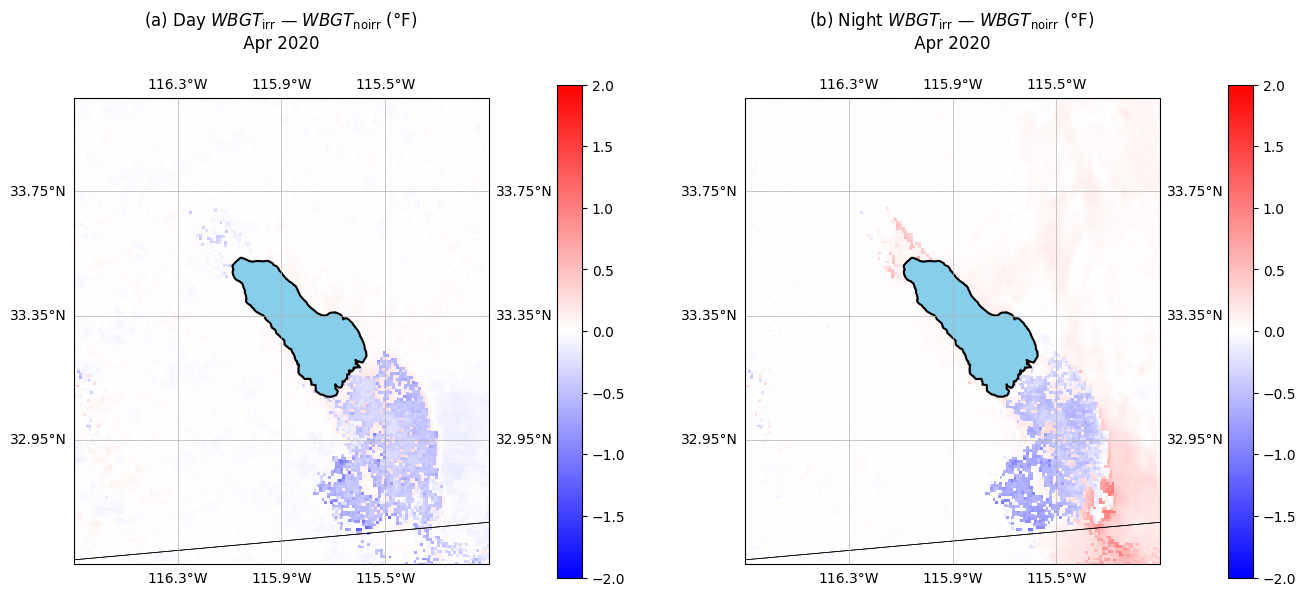

In [ ]:
# plot daily mean difference day and night without significance

fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.18, hspace=0.3)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_f_diff_diff_day, cmap='bwr', vmin=-2, vmax=2)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Day $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0F) \n Apr 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_f_diff_diff_night, cmap='bwr', vmin=-2, vmax=2)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Night $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0F) \n Apr 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)



#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_diff_irr_av_apr_nosig.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()



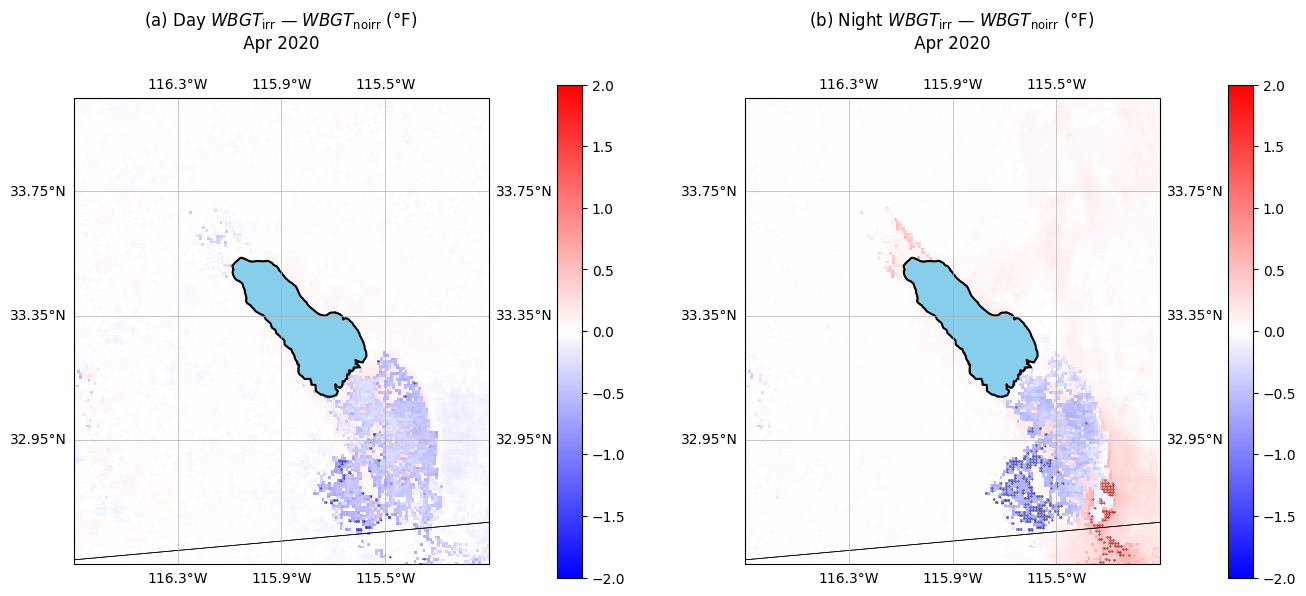

In [ ]:
# plot daily mean difference day and night with significance

fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.18, hspace=0.3)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_f_diff_diff_day, cmap='bwr', vmin=-2, vmax=2)
ax_1.scatter(significant_lon_day, significant_lat_day, s=0.3, c='#000000', marker='.', alpha=1, facecolors='#000000') # this is to plot significant dots if needed
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Day $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0F) \n Apr 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_f_diff_diff_night, cmap='bwr', vmin=-2, vmax=2)
ax_2.scatter(significant_lon_night, significant_lat_night, s=0.3, c='#000000', marker='.', alpha=1, facecolors='#000000') # this is to plot significant dots if needed
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Night $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0F) \n Apr 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)



#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_diff_irr_av_apr_withsig.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()



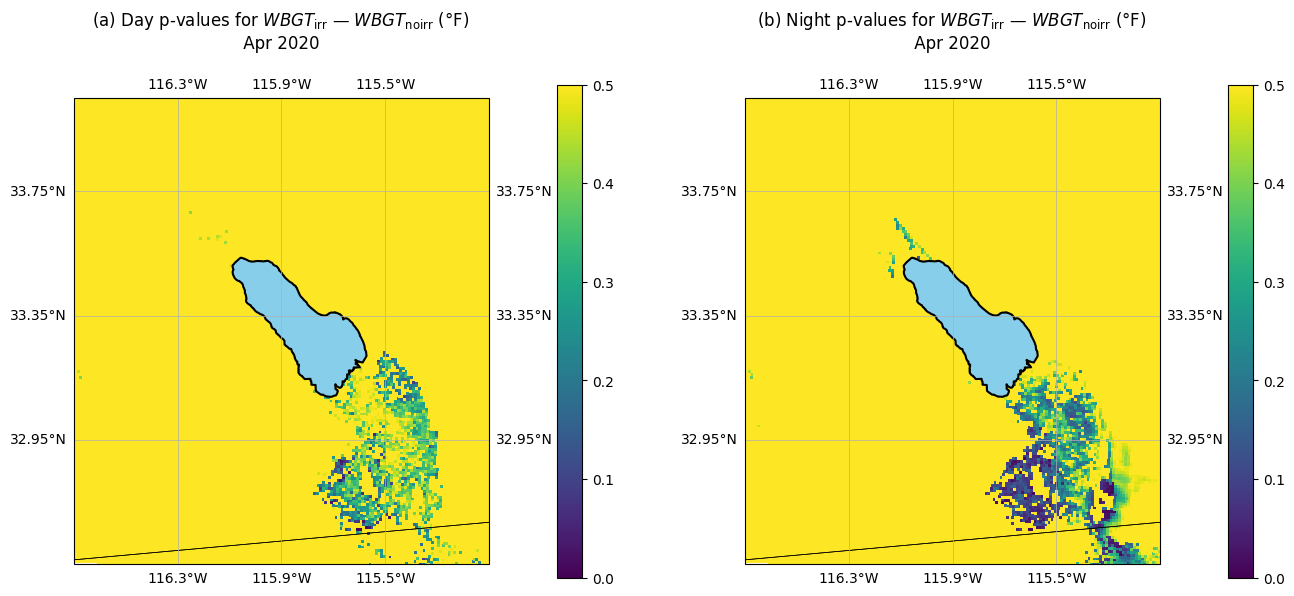

In [ ]:
# plot day night difference p values


fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.18, hspace=0.3)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_diff_sig_reshape_day, vmin=0, vmax=0.5)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Day p-values for $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0F) \n Apr 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_diff_sig_reshape_night, vmin=0, vmax=0.5)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Night p-values for $WBGT_{\\mathrm{irr}}$ \u2014 $WBGT_{\\mathrm{noirr}}$ (\u00b0F) \n Apr 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)


#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_diff_irr_av_apr_sig.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()



In [ ]:
# stations
import pandas as pd
carb = pd.read_csv(r'/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/stn_lat_long_IV.csv')
cimis = pd.read_csv(r'/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/stn_lat_long_IV_cimis.csv')

print(carb)
print(cimis)

                        name   latitude   longitude
0               Bombay Beach  33.352636 -115.734192
1                  Buttercup  32.739722 -114.883889
2                   Cahuilla  32.973611 -115.173611
3      Calexico-Ethel Street  32.676180 -115.483070
4       El Centro-9th Street  32.792150 -115.562990
5            Naval Test Base  33.169226 -115.855927
6        Niland-English Road  33.213488 -115.545136
7                Salton City  33.272754 -115.900616
8                 Sonny Bono  33.176383 -115.623100
9                 Squaw Lake  32.908333 -114.494444
10  Westmorland-W 1st Street  33.032390 -115.623618
              Stn_Name  latitude  longitude
0  Calipatria/Mulberry  33.04399   -115.415
1               Seeley  32.75900   -115.732
2             Meloland  32.80700   -115.446
3        Palo Verde II  33.38900   -114.726
4    Westmorland North  33.07860   -115.661


In [ ]:
# For CARB

!pip install haversine
from haversine import haversine

# Reshape the latitude and longitude dimensions of data_array for broadcasting

lat_all = np.stack([lat.ravel()]).T;
lon_all = np.stack([lon.ravel()]).T;

print(lat_all.shape)
print(lon_all.shape)

comb_lat_lon = np.concatenate((lat_all, lon_all), axis=1)
print(comb_lat_lon.shape)


# Calculate great circle distances for all station and grid point pairs
station_lat = carb[['latitude']].values
station_lon = carb[['longitude']].values

station_lat_lon = np.concatenate((station_lat, station_lon), axis=1)
print(station_lat_lon.shape)
#station_lat.shape

max_lat = max(lat_all)
print(max_lat)

from haversine import haversine_vector, Unit

#distances = haversine_vector([station_lat_lon[1,:]], [comb_lat_lon[1,:]], Unit.DEGREES, comb=True)


# Initialize an array to store the distances
distances = np.zeros((11, 27702))

# Loop through each pair of coordinates
for i in range(11):  # the first dimension in station_lat_lon
    for j in range(27702):  # the first dimension in comb_lat_lon
        # Compute haversine distance for the current pair of coordinates
        distances[i, j] = haversine_vector([station_lat_lon[i, :]],
                                           [comb_lat_lon[j, :]],
                                           Unit.DEGREES,
                                           comb=True)


# Find the index of the minimum distance for each station
min_distance_indices = np.argmin(distances, axis=1)
min_distance_indices
# Convert the 1D indices to multidimensional indices
indices = np.unravel_index(min_distance_indices, [171, 162])
indices

# Extract data for the closest grid points

closest_data_sensor_day = wbgt_f_diff_diff_day[indices[0], indices[1]]
closest_data_sensor_new_day = closest_data_sensor_day.T
print ('CARB day')
print(closest_data_sensor_new_day)

closest_data_sensor_night = wbgt_f_diff_diff_night[indices[0], indices[1]]
closest_data_sensor_new_night = closest_data_sensor_night.T
print ('CARB night')
print(closest_data_sensor_new_night)

(27702, 1)
(27702, 1)
(27702, 2)
(11, 2)
[34.111755]


<ipython-input-15-63eb130d32df>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distances[i, j] = haversine_vector([station_lat_lon[i, :]],


CARB day
[ 0.00085742 -0.04286313 -0.09673744  0.06347424  0.03451717  0.05204218
  0.01401184  0.03437078  0.05639471 -0.04123819 -0.63803127]
CARB night
[ 0.10566298  0.18809123  0.02696735  0.1086253   0.07873251  0.03634333
  0.08368779  0.03836447  0.08195758  0.04758245 -0.5711344 ]


In [ ]:
# for CIMIS locate positive and negative areas

!pip install haversine
from haversine import haversine

# Reshape the latitude and longitude dimensions of data_array for broadcasting

lat_all = np.stack([lat.ravel()]).T;
lon_all = np.stack([lon.ravel()]).T;

print(lat_all.shape)
print(lon_all.shape)

comb_lat_lon = np.concatenate((lat_all, lon_all), axis=1)
print(comb_lat_lon.shape)


# Calculate great circle distances for all station and grid point pairs
station_lat = cimis[['latitude']].values
station_lon = cimis[['longitude']].values

station_lat_lon = np.concatenate((station_lat, station_lon), axis=1)
print(station_lat_lon.shape)
#station_lat.shape

max_lat = max(lat_all)
print(max_lat)

from haversine import haversine_vector, Unit

#distances = haversine_vector([station_lat_lon[1,:]], [comb_lat_lon[1,:]], Unit.DEGREES, comb=True)


# Initialize an array to store the distances
distances = np.zeros((5, 27702))

# Loop through each pair of coordinates
for i in range(5):  # the first dimension in station_lat_lon
    for j in range(27702):  # the first dimension in comb_lat_lon
        # Compute haversine distance for the current pair of coordinates
        distances[i, j] = haversine_vector([station_lat_lon[i, :]],
                                           [comb_lat_lon[j, :]],
                                           Unit.DEGREES,
                                           comb=True)


# Find the index of the minimum distance for each station
min_distance_indices = np.argmin(distances, axis=1)
min_distance_indices
# Convert the 1D indices to multidimensional indices
indices = np.unravel_index(min_distance_indices, [171, 162])
indices

# Extract data for the closest grid points

closest_data_sensor_day_cimis = wbgt_f_diff_diff_day[indices[0], indices[1]]
closest_data_sensor_new_day_cimis = closest_data_sensor_day_cimis.T
print ('CIMIS day')
print(closest_data_sensor_new_day_cimis)
closest_data_sensor_night_cimis = wbgt_f_diff_diff_night[indices[0], indices[1]]
closest_data_sensor_new_night_cimis = closest_data_sensor_night_cimis.T
print ('CIMIS night')
print(closest_data_sensor_new_night_cimis)


(27702, 1)
(27702, 1)
(27702, 2)
(5, 2)
[34.111755]


<ipython-input-16-5f63edfb0850>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distances[i, j] = haversine_vector([station_lat_lon[i, :]],


CIMIS day
[-0.40925622  0.03528952 -0.33184179 -0.00375377  0.07228215]
CIMIS night
[-0.53673381  0.00288175 -0.43207646  0.01994641  0.05224462]
